Week5：优衣库销售产品分析

## 一、问题界定

    整体销售情况随着时间的变化是怎样的？
    不同产品的销售情况是怎样的？顾客偏爱哪一种购买方式？
    销售额和产品成本之间的关系怎么样？

## 二、数据查看、简单清洗与整理

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
plt.rcParams['font.sans-serif'] = ['simhei']

In [3]:
data=pd.read_csv('C:\\Users\mac\Desktop\数据分析班\week5\\unique.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22293 entries, 0 to 22292
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store_id      22293 non-null  int64  
 1   city          22293 non-null  object 
 2   channel       22293 non-null  object 
 3   gender_group  22293 non-null  object 
 4   age_group     22293 non-null  object 
 5   wkd_ind       22293 non-null  object 
 6   product       22293 non-null  object 
 7   customer      22293 non-null  int64  
 8   revenue       22293 non-null  float64
 9   order         22293 non-null  int64  
 10  quant         22293 non-null  int64  
 11  unit_cost     22293 non-null  int64  
 12  unit_price    22293 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 2.2+ MB


In [4]:
data.head()

,store_id,city,channel,gender_group,age_group,wkd_ind,product,customer,revenue,order,quant,unit_cost,unit_price
0,658,深圳,线下,Female,25-29,Weekday,当季新品,4,796.0,4,4,59,199
1,146,杭州,线下,Female,25-29,Weekday,运动,1,149.0,1,1,49,149
2,70,深圳,线下,Male,>=60,Weekday,T恤,2,178.0,2,2,49,89
3,658,深圳,线下,Female,25-29,Weekday,T恤,1,59.0,1,1,49,59
4,229,深圳,线下,Male,20-24,Weekend,袜子,2,65.0,2,3,9,22


In [5]:
data.describe(include='all')

,store_id,city,channel,gender_group,age_group,wkd_ind,product,customer,revenue,order,quant,unit_cost,unit_price
count,22293.000000,22293,22293,22293,22293,22293,22293,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000
unique,NaN,10,2,3,11,2,9,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,深圳,线下,Female,30-34,Weekday,T恤,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4364,18403,14208,4426,12465,10610,NaN,NaN,NaN,NaN,NaN,NaN
mean,335.391558,NaN,NaN,NaN,NaN,NaN,NaN,1.629480,159.531371,1.651998,1.858072,46.124658,84.279998
std,230.236167,NaN,NaN,NaN,NaN,NaN,NaN,1.785605,276.254066,1.861480,2.347301,19.124347,46.314296
min,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.660000,1.000000,1.000000,9.000000,0.000000
25%,142.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,64.000000,1.000000,1.000000,49.000000,56.000000
50%,315.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,99.000000,1.000000,1.000000,49.000000,79.000000
75%,480.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,175.000000,2.000000,2.000000,49.000000,99.000000


    revenue存在异常值，需要处理

In [6]:
data[data['revenue']<0]

,store_id,city,channel,gender_group,age_group,wkd_ind,product,customer,revenue,order,quant,unit_cost,unit_price
20049,91,武汉,线上,Female,55-59,Weekday,运动,1,-0.66,1,2,49,0


In [7]:
df_clean=data.copy()

In [8]:
df_clean=df_clean.drop(df_clean[data['revenue']<0].index)

In [9]:
df_clean.describe(include='all')

,store_id,city,channel,gender_group,age_group,wkd_ind,product,customer,revenue,order,quant,unit_cost,unit_price
count,22292.000000,22292,22292,22292,22292,22292,22292,22292.000000,22292.000000,22292.000000,22292.000000,22292.000000,22292.000000
unique,NaN,10,2,3,11,2,9,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,深圳,线下,Female,30-34,Weekday,T恤,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4364,18403,14207,4426,12464,10610,NaN,NaN,NaN,NaN,NaN,NaN
mean,335.402521,NaN,NaN,NaN,NaN,NaN,NaN,1.629508,159.538557,1.652028,1.858066,46.124529,84.283779
std,230.235512,NaN,NaN,NaN,NaN,NaN,NaN,1.785640,276.258179,1.861517,2.347353,19.124766,46.311894
min,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,1.000000,1.000000,9.000000,0.000000
25%,142.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,64.000000,1.000000,1.000000,49.000000,56.000000
50%,315.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,99.000000,1.000000,1.000000,49.000000,79.000000
75%,480.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,175.000000,2.000000,2.000000,49.000000,99.000000


## 三、数据探索与可视化

### 1、整体销售情况随着时间的变化是怎样的？

    （1）思路：
    ①变量选择：
    销售情况可以用销售数量quant和销售金额revenue体现，时间则用周末/周中wkd_ind表示
    ②数据关系：
    对比销售数据在周中和周末分组下的分布情况
    ③图表：柱状图
    


<AxesSubplot:xlabel='wkd_ind'>

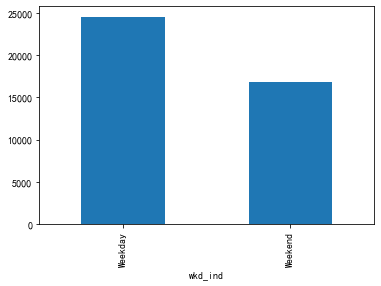

In [10]:
df_clean.groupby('wkd_ind')['quant'].sum().plot(kind='bar')

<AxesSubplot:xlabel='wkd_ind'>

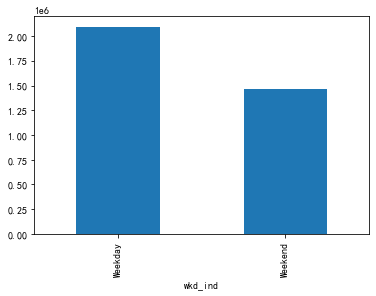

In [11]:
df_clean.groupby('wkd_ind')['revenue'].sum().plot(kind='bar')

<AxesSubplot:xlabel='wkd_ind'>

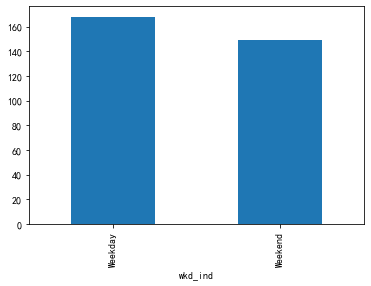

In [12]:
df_clean.groupby('wkd_ind')['revenue'].mean().plot(kind='bar')

####    总结
    从上图可以看出，整体来看，在周末的销售数量和销售总额要远高于在工作日的，但是周末销售总额的均值不如总和显著

### 2、不同产品的销售情况是怎样的？

    （1）思路：
    ①变量选择：
    不同产品用产品类别product来区分，销售情况用销售数量quant和销售总额revenue，以及利润profit=revenue-unit_cost*quant来表示
    ②数据关系：
    对比不同类别产品在销售数量和销售总额上的区别
    ③图表：柱状图

<AxesSubplot:xlabel='product'>

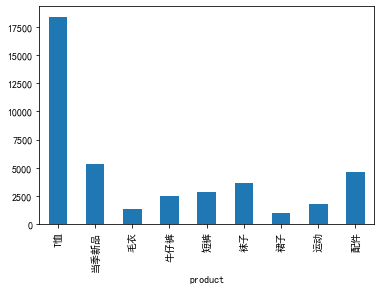

In [13]:
df_clean.groupby('product')['quant'].sum().plot(kind='bar')

<AxesSubplot:xlabel='product'>

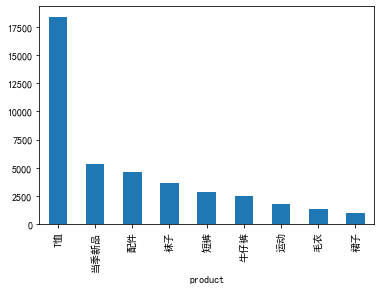

In [14]:
df_clean.groupby('product')['quant'].sum().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='product'>

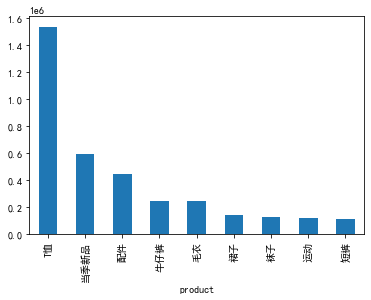

In [15]:
df_clean.groupby('product')['revenue'].sum().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='product'>

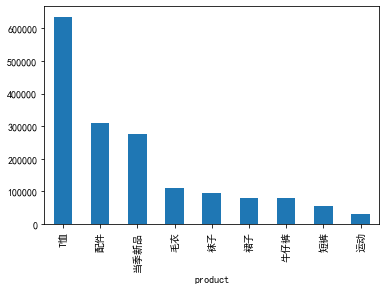

In [16]:
df_clean['profit']=df_clean['revenue']-df_clean['quant']*df_clean['unit_cost']
df_clean.groupby('product')['profit'].sum().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='product'>

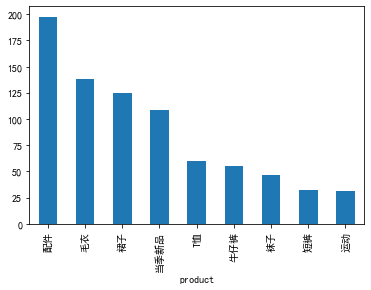

In [17]:
df_clean.groupby('product')['profit'].mean().sort_values(ascending=False).plot(kind='bar')

#### 总结

    由上图可知，无论是销售数量、销售金额还是利润综总和，T恤占据绝对领先的位置，是第二名的两倍以上
    其次是当季新品和配件，其中虽然当季新品的销售数量和金额高于配件，但配件的利润总和要稍高于当季新品
    而对于平均利润而言，配件、毛衣和裤子的平均利润最高，都在100元以上

### 3、顾客偏爱哪一种购买方式？

    思路：
    ①变量选择：细分为什么样的顾客偏好什么样的购买方式：
    顾客数量用count来表示，顾客可以用所在城市city、性别gender_Group、年龄段age_group来分类，购买方式用购买渠道channel来表示
    ②数据关系：
    对比不同特征的顾客在不同渠道上的分布
    ③图表：柱状图

    ·城市

In [18]:
df_clean['count'] = 1

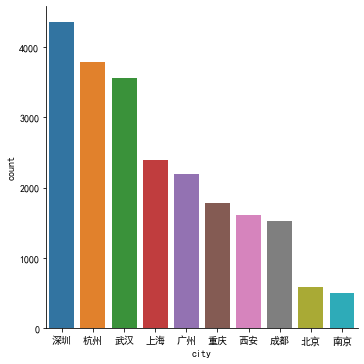

In [19]:
tmp0 = df_clean.groupby(['city'])['count'].count().sort_values(ascending=False)
tmp0 = tmp0.reset_index()
sns.catplot(x='city',y='count',kind='bar',data=tmp0)

    ·渠道和城市

In [20]:
tmp1 = df_clean.groupby(['channel','city'])['count'].count()
tmp1 = tmp1.reset_index()

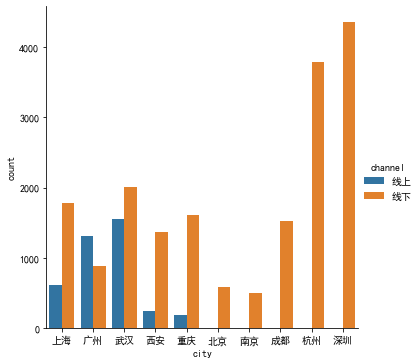

In [21]:
sns.catplot(x='city',y='count',hue='channel',kind='bar',data=tmp1)

    ·渠道和性别

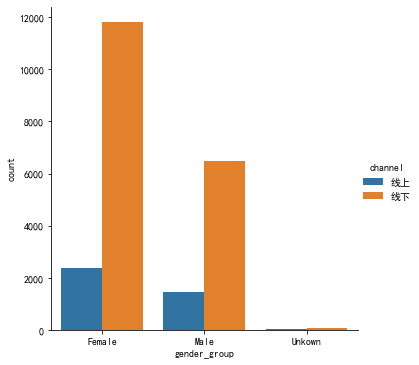

In [22]:
tmp2 = df_clean.groupby(['channel','gender_group'])['count'].count()
tmp2 = tmp2.reset_index()
sns.catplot(x='gender_group',y='count',hue='channel',kind='bar',data=tmp2)

    ·渠道和年龄

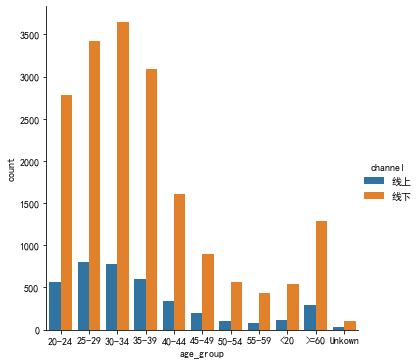

In [23]:
tmp3 = df_clean.groupby(['channel','age_group'])['count'].count()
tmp3 = tmp3.reset_index()
sns.catplot(x='age_group',y='count',hue='channel',kind='bar',data=tmp3)

In [24]:
age_orders = ['<20','20-24','25-29',  '30-34','35-39',  '40-44','45-49', '50-54','55-59','>=60', 'Unkown']

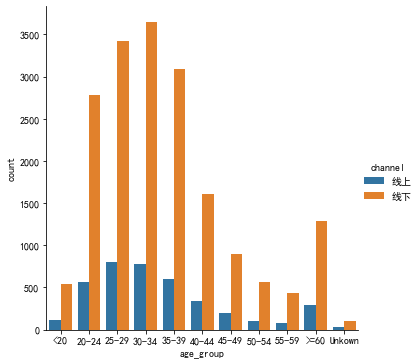

In [25]:
sns.catplot(x='age_group',y='count',hue='channel',kind='bar',data=tmp3,order=age_orders)

    ·性别和年龄

In [68]:
tmp4= df_clean.groupby(['gender_group','age_group'])['count'].count()
tmp4= tmp4.reset_index()

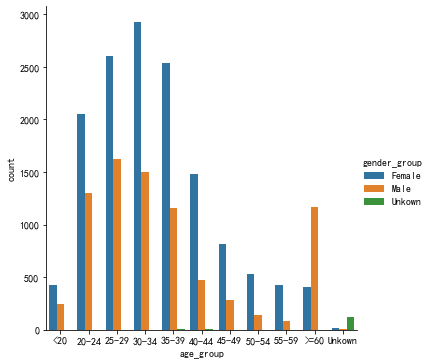

In [69]:
sns.catplot(x='age_group',y='count',hue='gender_group',kind='bar',data=tmp4,order=age_orders)

#### 总结

    由上述图形可得：
    对于渠道来说：绝大部分的城市偏好线下购买，只有广州是唯一线上超过线下的地方；全年龄段以及无论男女都更偏好在线下商店购买优衣库的产品
    对于城市来说：深圳、杭州和武汉是订单数最多的城市，均在3500以上，同时深圳和杭州几乎全是线下销售
    性别和年龄段：同时男女客户均集中分布在20~44岁之间，其中女性远多于男性，超过部分主要来自线下购物 


### 4、销售额和产品成本之间的关系怎么样？

    思路：
    ①变量选择：
    销售额可以用销售金额revenue和销售数量quant来度量，产品成本使用unit_cost表示
    ②数据关系：
    分析销售金额和销售数量与产品成本的相关关系
    ③图表：
    相关系数表+热力图

In [97]:
df_clean['tol_cost']=df_clean['quant']*df_clean['unit_cost']
rel=['revenue','tol_cost','profit']
df_clean[rel].corr()

,revenue,tol_cost,profit
revenue,1.000000,0.901396,0.961068
tol_cost,0.901396,1.000000,0.746662
profit,0.961068,0.746662,1.000000


<AxesSubplot:>

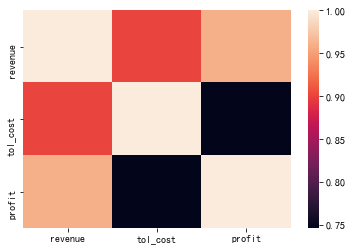

In [98]:
sns.heatmap(df_clean[rel].corr())

#### 总结

    由上图和上表可以看出：
    销售金额与总成本的相关系数为正，且接近与1，表示二者之间存在强烈的正相关的关系
    同时销售金额与总利润的相关系数也为正，且接近与1，表示二者之间存在强烈的正相关的关系

### 5、总体业务总结

    ·数据主要集中在深圳、杭州和武汉等城市，北京和南京数据较少
    ·无论性别如何，和年龄如何，选择线下购买的客户都远高于线上购买的
    ·优衣库的客户年龄主要分布在20~44岁之间，且女性多于男性
    ·周末的客户数量和销售总额显著高于工作日的，但是销售额均值超出值并不多
    ·T恤、当今新品是最畅销的产品，T恤和配件是利润总额最高的商品，但是配件的单件利润要显著高
